In [1]:
import MDAnalysis as mda
import numpy as np
import matplotlib.pyplot as plt

/home/fabian/mambaforge/envs/ifnl4-analysis/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def angle_between_points(A, B, C):
    BA = A - B
    BC = C - B
    cosine_angle = np.dot(BA, BC) / (np.linalg.norm(BA) * np.linalg.norm(BC))
    angle = np.arccos(cosine_angle)
    return np.degrees(angle)

### IFNL3

In [13]:
ifnl3_rep1 = mda.Universe('ifnl3.tpr', 'ifnl3_rep1.xtc')
ifnl3_rep2 = mda.Universe('ifnl3.tpr', 'ifnl3_rep2.xtc')
ifnl3_rep3 = mda.Universe('ifnl3.tpr', 'ifnl3_rep3.xtc')
ifnl3 = mda.Universe('ifnl3.pdb', ['ifnl3_rep1.xtc', 'ifnl3_rep2.xtc', 'ifnl3_rep3.xtc'])

In [11]:
# Extract the different domains of the complex
il10rb = ifnl3.select_atoms('segid A and resid 20-111')
lr1 = ifnl3.select_atoms('segid B and resid 6-103')
l3 = ifnl3.select_atoms('segid C')


In [12]:
# Calculate the angle between the COM of the domains
angles_ifnl3 = []  # A list to store the angles for each frame

for ts in ifnl3.trajectory:
    COM1 = il10rb.center_of_mass()
    COM3 = lr1.center_of_mass()
    COM2 = l3.center_of_mass()
    
    angle = angle_between_points(COM1, COM2, COM3)
    angles_ifnl3.append(angle)

### IFNL4

In [15]:
a3_rep1 = mda.Universe('ifnl4_a3.tpr', 'ifnl4_a3_rep1.xtc')
a3_rep2 = mda.Universe('ifnl4_a3.tpr', 'ifnl4_a3_rep2.xtc')
a3_rep3 = mda.Universe('ifnl4_a3.tpr', 'ifnl4_a3_rep3.xtc')
ifnl4 = mda.Universe('ifnl4_a3.pdb', ['ifnl4_a3_rep1.xtc', 'ifnl4_a3_rep2.xtc', 'ifnl4_a3_rep3.xtc'])

In [16]:
il10rb = ifnl4.select_atoms('segid A and resid 20-111')
lr1 = ifnl4.select_atoms('segid B and resid 6-103')
l4 = ifnl4.select_atoms('segid C')

In [17]:
# Calculate the angle between the COM of the domains
angles_ifnl4 = []  # A list to store the angles for each frame

for ts in ifnl4.trajectory:
    COM1 = il10rb.center_of_mass()
    COM3 = lr1.center_of_mass()
    COM2 = l4.center_of_mass()
    
    angle = angle_between_points(COM1, COM2, COM3)
    angles_ifnl4.append(angle)

### Plot angles

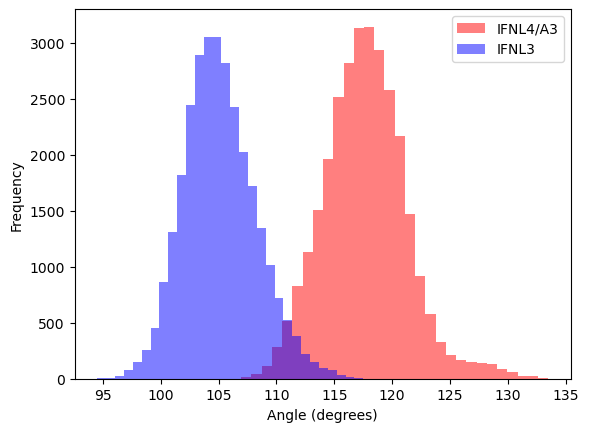

In [18]:

# Create a figure and axes
fig, ax = plt.subplots()

# Plot the distribution of angles for ifnl4
ax.hist(angles_ifnl4, bins=30, alpha=0.5, label='IFNL4/A3', color='red')

# Plot the distribution of angles for ifnl3
ax.hist(angles_ifnl3, bins=30, alpha=0.5, label='IFNL3', color='blue')

# Set the labels and title
ax.set_xlabel('Angle (degrees)')
ax.set_ylabel('Frequency')
#ax.set_title('Distribution of Angles')

# Add a legend
ax.legend()

# Show the plot
plt.show()

In [19]:
mean_ifnl4 = np.mean(angles_ifnl4)
mean_ifnl3 = np.mean(angles_ifnl3)
mean_difference = mean_ifnl4 - mean_ifnl3

mean_difference


12.564423838035765